In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

## Build the features you want to use (petal length, petal width)

In [15]:
iris=load_iris()
x=iris['data'][:,(2,3)]
#put the virhinica to main target 
y=(iris['target']==2).astype(np.int)

In [16]:
log_reg=LogisticRegression(C=10**10,random_state=42)
log_reg.fit(x,y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Construct the grid to plot the contour 

In [17]:
x0,x1=np.meshgrid(
            np.linspace(2.9,7,500).reshape(-1,1),
            np.linspace(0.9,2.7,200).reshape(-1,1))

## Make the shape to fit the original x

In [18]:
x_new=np.c_[x0.ravel(),x1.ravel()]
y_proba=log_reg.predict_proba(x_new)

## Begin to plot

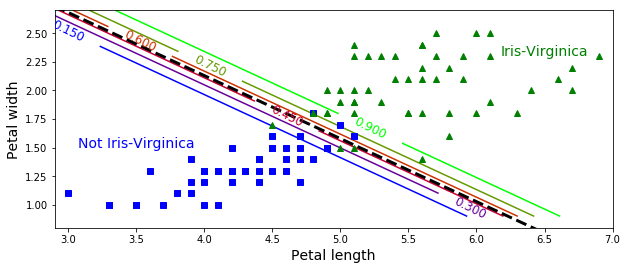

In [25]:
plt.figure(figsize=(10,4))
plt.plot(x[y==0,0],x[y==0,1],'bs')
plt.plot(x[y==1,0],x[y==1,1],'g^')
x0_x1_grid=y_proba[:,1].reshape(x0.shape)
contour=plt.contour(x0,x1,x0_x1_grid,cmap=plt.cm.brg)
#Label the proba in the figure
plt.clabel(contour,inline=True,fontsize=12)
left_right=np.array([2.9,7])
#y is stable, so you have to find the relation of x0 and x1
boundary=-(log_reg.coef_[0][0]*left_right+log_reg.intercept_[0])/log_reg.coef_[0][1]
plt.plot(left_right,boundary,'k--',linewidth=3)
plt.text(3.5,1.5,'Not Iris-Virginica',fontsize=14,color='b',ha='center')
plt.text(6.5,2.3,'Iris-Virginica',fontsize=14,color='g',ha='center')
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.axis([2.9,7,0.8,2.7])
plt.show()

## Then I know how the area would have the largest probabilities to belong 'Iris-Virginica' or 'Not Iris-Virginica'.